# 5.3- Kepler

https://kepler.gl/

https://eng.uber.com/keplergl/

In [ ]:
!pip install keplergl

In [1]:
import geopandas as gpd

from keplergl import KeplerGl

import numpy as np

In [3]:
mex=gpd.read_file('../data/mexico.geojson')

mex.head()

,name,created_at,updated_at,cartodb_id,geometry
0,Baja California,2013-12-01T18:59:38+01:00,2013-12-01T18:59:38+01:00,6,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654..."
1,Sonora,2013-12-01T18:59:38+01:00,2013-12-01T18:59:38+01:00,7,"MULTIPOLYGON (((-114.88259 32.49215, -114.8809..."
2,Baja California Sur,2013-12-01T18:59:38+01:00,2013-12-01T18:59:38+01:00,8,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574..."
3,Zacatecas,2013-12-01T18:59:38+01:00,2013-12-01T18:59:38+01:00,9,"MULTIPOLYGON (((-101.84881 25.01762, -101.8319..."
4,Durango,2013-12-01T18:59:38+01:00,2013-12-01T18:59:38+01:00,10,"MULTIPOLYGON (((-105.96732 26.78554, -105.9391..."


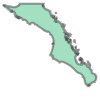

In [7]:
mex.geometry[2]

In [8]:
mex.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        32 non-null     object  
 1   created_at  32 non-null     object  
 2   updated_at  32 non-null     object  
 3   cartodb_id  32 non-null     int64   
 4   geometry    32 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 1.4+ KB


In [9]:
mex=mex.sort_values(by='name').reset_index()[['name', 'geometry']]

mex.head()

,name,geometry
0,Aguascalientes,"MULTIPOLYGON (((-102.28786 22.41649, -102.2875..."
1,Baja California,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654..."
2,Baja California Sur,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574..."
3,Campeche,"MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ..."
4,Chiapas,"MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ..."


In [10]:
mex['data']=[i**3+30-2*i for i in range(len(mex))]

mex.head()

,name,geometry,data
0,Aguascalientes,"MULTIPOLYGON (((-102.28786 22.41649, -102.2875...",30
1,Baja California,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654...",29
2,Baja California Sur,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574...",34
3,Campeche,"MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ...",51
4,Chiapas,"MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ...",86


In [11]:
mapa=KeplerGl(height=600, width=600)

mapa.add_data(mex, 'Mexico')

mapa.save_to_html(file_name='images/mapa_kepler.html')

mapa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to images/mapa_kepler.html!


KeplerGl(data={'Mexico': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

In [13]:
mapa.config={
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "1523e3m",
          "type": "geojson",
          "config": {
            "dataId": "Mexico",
            "label": "Mexico",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                221,
                178,
                124
              ],
              "colorRange": {
                "name": "ColorBrewer PuBu-6",
                "type": "sequential",
                "category": "ColorBrewer",
                "colors": [
                  "#f1eef6",
                  "#d0d1e6",
                  "#a6bddb",
                  "#74a9cf",
                  "#2b8cbe",
                  "#045a8d"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 18.6,
              "stroked": True,
              "filled": True,
              "enable3d": True,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "data",
              "type": "integer"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": {
              "name": "data",
              "type": "integer"
            },
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Mexico": [
              {
                "name": "name",
                "format": None
              },
              {
                "name": "data",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 24,
      "dragRotate": True,
      "latitude": 25.74262832502209,
      "longitude": -103.32854724870657,
      "pitch": 50,
      "zoom": 4.470087678757357,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [14]:
mapa

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '1523e3m', 'type': …